0.006167465014829578
0.9937942613089019


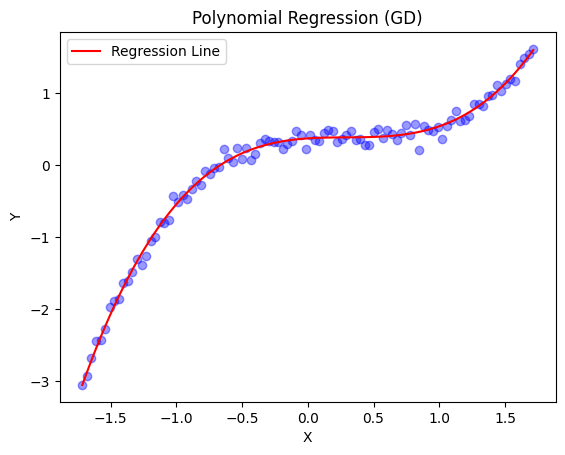

In [56]:
# polynomial regression using GD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

csv=pd.read_csv('poly_data.csv')

x_pn=np.array(csv['X']).reshape(-1,1)
y_pn=np.array(csv['y']).reshape(-1,1)

# normalizing data
x = (x_pn-np.mean(x_pn))/np.std(x_pn)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

def PR_GD(x,y,alpha,iter,pd):
    n=len(y)

    # x shape: nxm
    X=np.ones((n,1))
    for i in range(1,pd+1):
        X=np.c_[X,x**i]

    # beta shape: mx1
    beta=np.zeros((X.shape[1],1))
    
    for _ in range(iter):
        y_pred=X @ beta
        cf=y_pred - y
        gradient = (2/n) * (X.T @ cf)
        beta -= alpha * gradient

    # y_predicted shape: nx1
    y_predicted=X @ beta
    # model evaluation
    mse = mean_squared_error(y_predicted,y)
    r2=r2_score(y_predicted,y)
    print(mse)
    print(r2)

    # plotting
    plt.scatter(x, y, color='blue', alpha=0.4)
    plt.plot(x, y_predicted, color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel("Y")
    plt.legend()
    plt.title('Polynomial Regression (GD)')
    plt.show()

PR_GD(x,y,0.1,10000,3)

